In [12]:
pip install sympy

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, ln

# Given device parameters
Pr = 2.5e-6  # Remnant polarization (C/cm^2)
Ps = 3e-6    # Saturation polarization (C/cm^2)
Ec = 50e3    # Coercive field (V/cm)
epsilon_F = 150  # Dielectric constant of ferroelectric
epsilon_0 = 8.85e-14  # vacuum permittivity in F/cm
t_F = 200e-7     # Ferroelectric film thickness (cm)
EOT = 4e-7       # Equivalent oxide thickness of insulator (cm)
N_a = 1e16       # Substrate doping concentration (/cm^3)
A_F = 1          # Ferroelectric film area for capacitor (cm^2)
A_I = 1          # Insulator film area for capacitor (cm^2)
mu = 300         # Electron mobility (cm^2/V-s)
L = 1e-4         # Channel length for FET (cm)
W = 1e-4         # Channel width for FET (cm)

# Constants
q = 1.602176634e-19  # Elementary charge (C)
k = 1.380649e-23     # Boltzmann constant (J/K)
T = 300    

In [21]:
from sympy import symbols, ln

# Define the variables symbolically
Ec, Pr, Ps = symbols('Ec Pr Ps')

# Define the equation for delta using ln for natural logarithm
delta_equation = Ec / ln((Pr/Ps + 1)/(-Pr/Ps + 1))

# Print the equation
print(f"delta = {delta_equation}")


delta = Ec/log((Pr/Ps + 1)/(-Pr/Ps + 1))


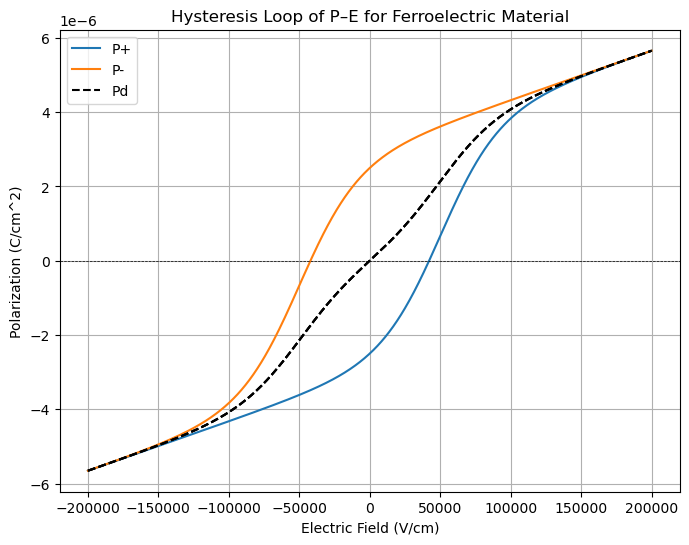

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Given device parameters
Pr = 2.5e-6  # Remnant polarization (C/cm^2)
Ps = 3e-6    # Saturation polarization (C/cm^2)
Ec = 50e3    # Coercive field (V/cm)
epsilon_F = 150  # Dielectric constant of ferroelectric
epsilon_0 = 8.85e-14  # Vacuum permittivity in F/cm

# Maximum electric field values
Em_values = [200e3, 75e3, 50e3]

# Calculate delta using EQ2
delta = Ec * (np.log((1 + Pr/Ps)/(1 - Pr/Ps))) ** -1

# Define functions for the polarization equations
def P_plus(E, Em):
    return Ps * np.tanh((E - Ec)/(2 * delta)) + epsilon_F * epsilon_0 * E + 0.5 * (
            Ps * np.tanh((Em + Ec)/(2 * delta)) - Ps * np.tanh((Em - Ec)/(2 * delta)))

def P_minus(E, Em):
    return -P_plus(-E, Em)

def P_total(Em):
    return epsilon_F * epsilon_0 * Em + 0.5 * (Ps * np.tanh((Em + Ec)/(2 * delta)) + Ps * np.tanh((Em - Ec)/(2 * delta)))

# Generate electric field values
Emax = max(Em_values)
E_values = np.linspace(-Emax, Emax, 1000)

# Calculate polarization values for each electric field
P_plus_values = P_plus(E_values, Emax)
P_minus_values = P_minus(E_values, Emax)
P_total_values = P_total(Emax)

# Plot the P–E loops
plt.figure(figsize=(8, 6))
plt.plot(E_values, P_plus_values, label='P+')
plt.plot(E_values, P_minus_values, label='P-')
plt.plot(E_values, P_total(E_values), '--', label='Pd', color='black')  # Corrected Pd curve
plt.title('Hysteresis Loop of P–E for Ferroelectric Material')
plt.xlabel('Electric Field (V/cm)')
plt.ylabel('Polarization (C/cm^2)')

# Plot additional P–E loops for Em 75e3 and 50e3
for Em in Em_values[1:]:
    P_total_values = P_total(Em)
    plt.plot(E_values, P_total(E_values), '--', color='black')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


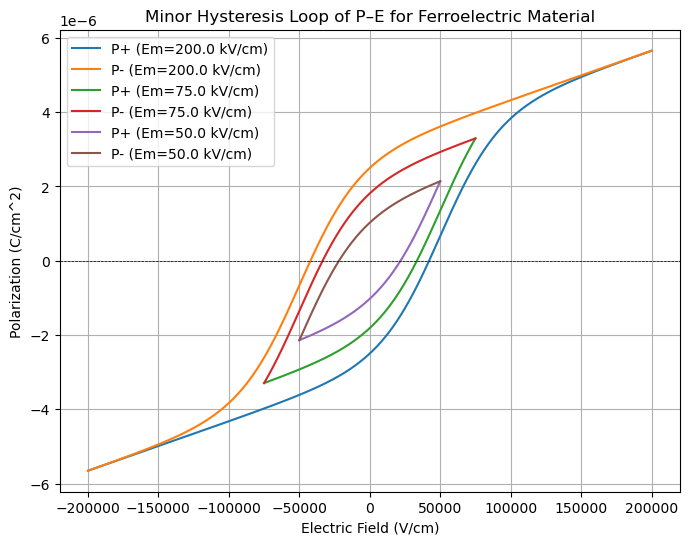

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Given device parameters
Pr = 2.5e-6  # Remnant polarization (C/cm^2)
Ps = 3e-6    # Saturation polarization (C/cm^2)
Ec = 50e3    # Coercive field (V/cm)
epsilon_F = 150  # Dielectric constant of ferroelectric
epsilon_0 = 8.85e-14  # Vacuum permittivity in F/cm

# Maximum electric field values
Em_values = [200e3, 75e3, 50e3]

# Calculate delta using EQ2
delta = Ec * (np.log((1 + Pr/Ps)/(1 - Pr/Ps))) ** -1

# Define functions for the polarization equations
def P_plus(E, Em):
    return Ps * np.tanh((E - Ec)/(2 * delta)) + epsilon_F * epsilon_0 * E + 0.5 * (
            Ps * np.tanh((Em + Ec)/(2 * delta)) - Ps * np.tanh((Em - Ec)/(2 * delta)))

def P_minus(E, Em):
    return -P_plus(-E, Em)

def P_total(E, Em):
    return epsilon_F * epsilon_0 * Em + 0.5 * (Ps * np.tanh((Em + Ec)/(2 * delta)) + Ps * np.tanh((Em - Ec)/(2 * delta)))

# Plot the P–E loops
plt.figure(figsize=(8, 6))

# Plot P–E curves for Em = 200, 75, and 50 using their respective Emax values
for Em in Em_values:
    Emax = np.abs(Em)
    E_values = np.linspace(-Emax, Emax, 1000)
    plt.plot(E_values, P_plus(E_values, Em), label=f'P+ (Em={Em/1e3} kV/cm)')
    plt.plot(E_values, P_minus(E_values, Em), label=f'P- (Em={Em/1e3} kV/cm)')

# Plot the Pd curve for Em = 200 using its Emax value
#Emax_200 = np.abs(Em_values[0])
#E_values_200 = np.linspace(-Emax_200, Emax_200, 1000)
#Pd_values_200 = np.array([P_total(E, Em_values[0]) for E in E_values_200])
#plt.plot(E_values_200, Pd_values_200, '--', label='Pd (Em=200 kV/cm)', color='black')

plt.title('Minor Hysteresis Loop of P–E for Ferroelectric Material')
plt.xlabel('Electric Field (V/cm)')
plt.ylabel('Polarization (C/cm^2)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


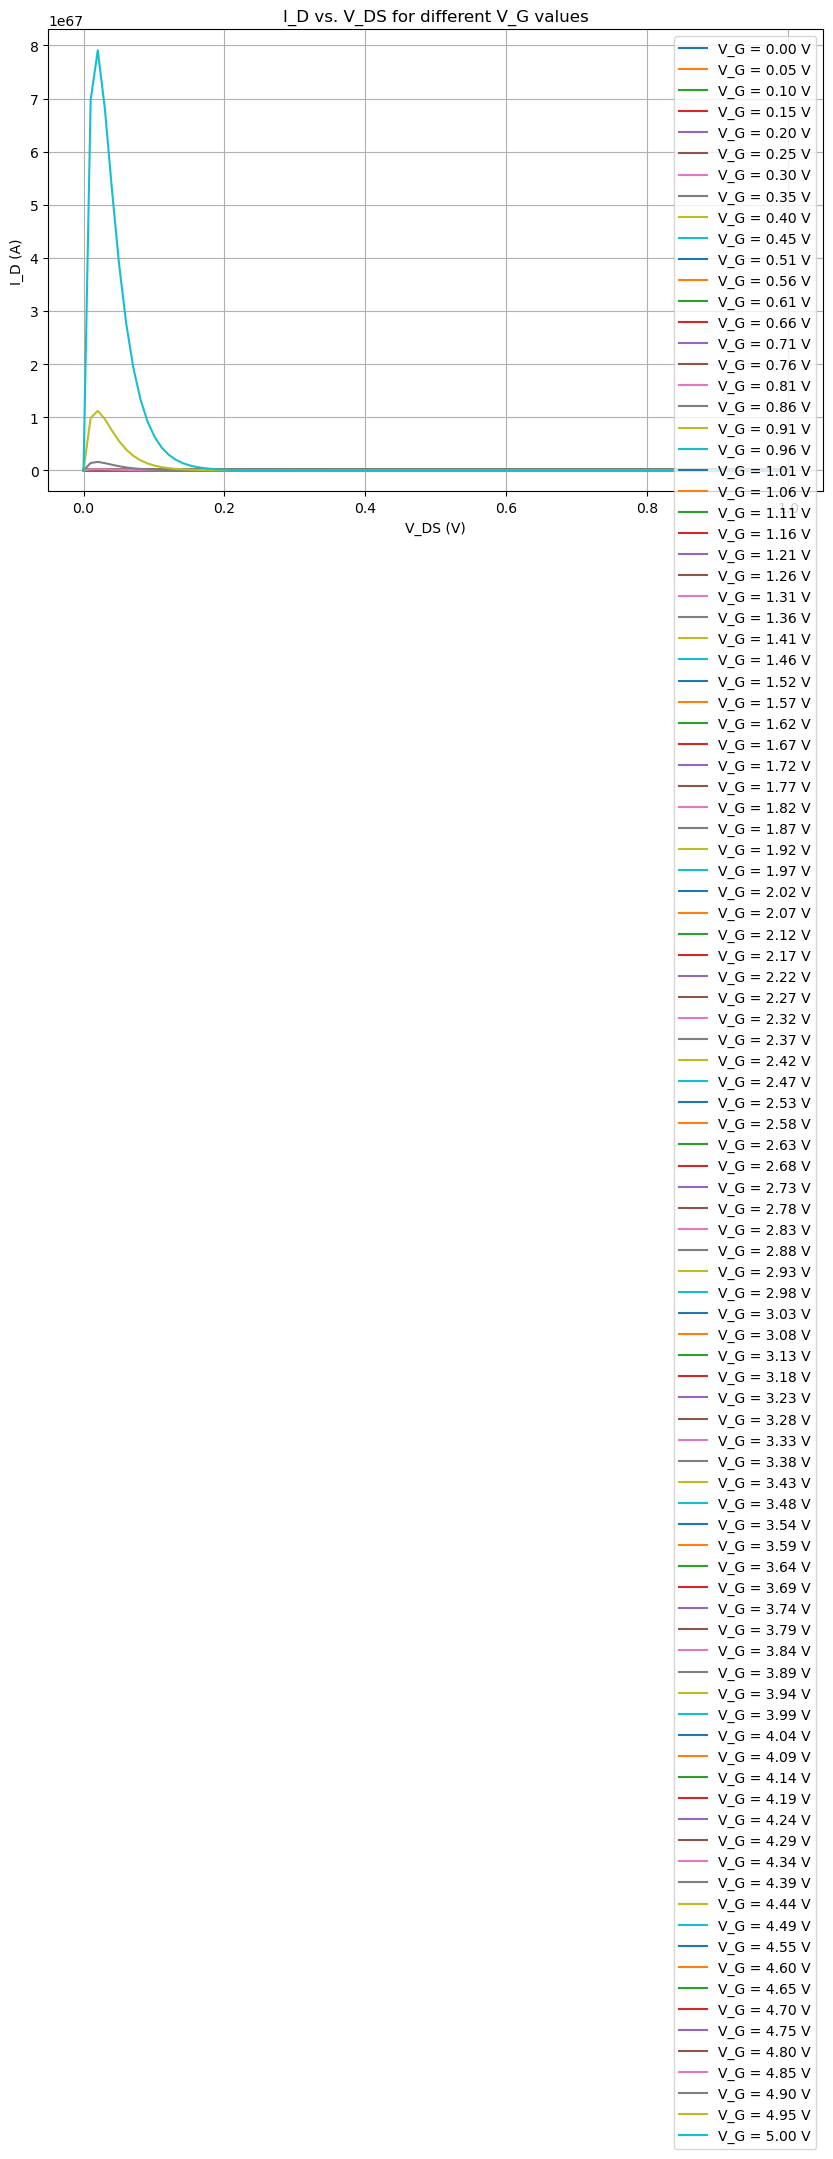

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Given device parameters
Pr = 2.5e-6  # Remnant polarization (C/cm^2)
Ps = 3e-6    # Saturation polarization (C/cm^2)
Ec = 50e3    # Coercive field (V/cm)
epsilon_F = 150  # Dielectric constant of ferroelectric
epsilon_0 = 8.85e-14  # Vacuum permittivity in F/cm
t_F = 200e-7     # Ferroelectric film thickness (cm)
EOT = 4e-7       # Equivalent oxide thickness of insulator (cm)
N_a = 1e16       # Substrate doping concentration (/cm^3)
A_F = 1          # Ferroelectric film area for capacitor (cm^2)
A_I = 1          # Insulator film area for capacitor (cm^2)
mu = 300         # Electron mobility (cm^2/V-s)
L = 1e-4         # Channel length for FET (cm)
W = 1e-4         # Channel width for FET (cm)

# Constants
q = 1.602176634e-19  # Elementary charge (C)
k = 1.380649e-23     # Boltzmann constant (J/K)
T = 300             # Temperature (K)
ni = 1e10           # Intrinsic carrier concentration (/cm^3)
beta = q / (k * T)  # Thermodynamic beta

# Function to calculate ID
def integrand(psi, V, ni, Na, beta):
    xi = 1  # You need to define the function xi(ψ, V) as it appears in your equations
    return ni**2 / Na * np.exp(beta * (psi - V)) / xi

def calculate_ID(V_G, V_DS):
    psi_S = V_G - V_DS  # Assuming linear relationship for psi_s
    result, _ = dblquad(integrand, 0, V_DS, lambda x: 0, lambda x: psi_S, args=(ni, N_a, beta))
    return q * mu * W / L * result

# Voltage values
V_G_values = np.linspace(0, 5, 100)
V_DS_values = np.linspace(0, 1, 100)

# Calculate ID for different V_G values
ID_values = []
for V_G in V_G_values:
    ID_VG = [calculate_ID(V_G, V_DS) for V_DS in V_DS_values]
    ID_values.append(ID_VG)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(len(V_G_values)):
    plt.plot(V_DS_values, ID_values[i], label=f'V_G = {V_G_values[i]:.2f} V')

plt.xlabel('V_DS (V)')
plt.ylabel('I_D (A)')
plt.title('I_D vs. V_DS for different V_G values')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Ishanya\AppData\Local\Temp\ipykernel_27952\525648495.py:27: RuntimeWarning: overflow encountered in exp
  return ni_squared / N_a * np.exp(epsilon_F * (psi - V))
C:\Users\Ishanya\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\Ishanya\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The e

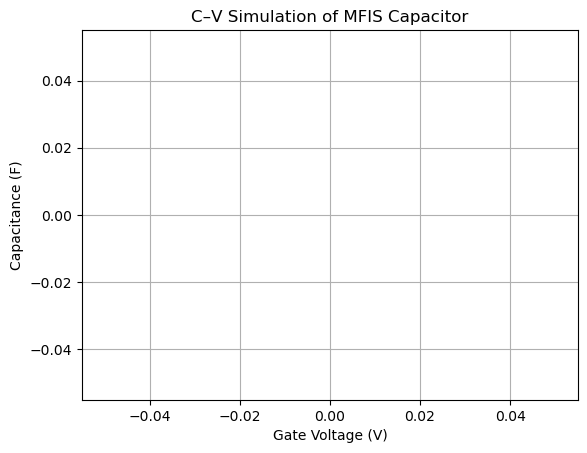

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Given device parameters
Pr = 2.5e-6  # Remnant polarization in microC/cm^2
Ps = 3e-6    # Saturation polarization in microC/cm^2
Ec = 50e3    # Coercive field in kV/cm
epsilon_F = 150
t_F = 200e-7  # Ferroelectric film thickness in cm
EOT = 4e-7    # Equivalent oxide thickness of insulator in cm
N_a = 1e16    # Substrate doping concentration in /cm^3
A_F = 1       # Ferroelectric film area for capacitor in cm^2
A_I = 1       # Insulator film area for capacitor in cm^2
mu = 300      # Electron mobility for FET in cm^2/V-s
L = 1e-4      # Channel length for FET in cm
W = 1e-4      # Channel width for FET in cm

# Constants
epsilon_0 = 8.85e-14  # Vacuum permittivity in F/cm

# Function to calculate C–V characteristics
def calculate_CV(V_G):
    # Function for integrand in capacitance calculation
    def integrand(psi, V):
        ni_squared = 1e10  # Dummy value for ni^2, replace with the actual value
        return ni_squared / N_a * np.exp(epsilon_F * (psi - V))

    # Capacitance calculation
    def capacitance(ψs, V):
        Qs = np.sqrt(2 * epsilon_F * epsilon_0 * 300 / (1.38e-23 * 300) / (q * L * D)) * \
             ((np.exp(-beta * ψs) + beta * ψs - 1) + (ni_squared / N_a) * np.exp(-beta * V) *
              (np.exp(beta * ψs) - beta * ψs * np.exp(beta * V) - 1)) ** 0.5

        return 1 / Qs

    # Parameters
    q = 1.602e-19  # Elementary charge
    beta = 1 / (8.617e-5 * 300)  # 1/(kT) at 300 K
    D = 1e-3  # Dummy value for D, replace with the actual value

    # Integration limits
    V_DS_limit = 5  # Dummy value, replace with the actual limit
    ψ_B_limit = -1  # Dummy value, replace with the actual limit
    ψ_S_limit = 1  # Dummy value, replace with the actual limit

    # Integrate the double integral
    result, _ = dblquad(integrand, ψ_B_limit, ψ_S_limit, lambda x: 0, lambda x: V_DS_limit)

    # Calculate total capacitance
    C_total = 1 / (1 / A_I * epsilon_F * epsilon_0 / EOT + 1 / A_F * epsilon_F * epsilon_0 / t_F + 1 / result)

    return C_total

# Generate gate voltage values for simulation
V_G_values = np.linspace(-5, 5, 100)

# Calculate capacitance for each gate voltage value
C_values = [calculate_CV(V_G) for V_G in V_G_values]

# Plot C–V curve
plt.plot(V_G_values, C_values)
plt.xlabel('Gate Voltage (V)')
plt.ylabel('Capacitance (F)')
plt.title('C–V Simulation of MFIS Capacitor')
plt.grid(True)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

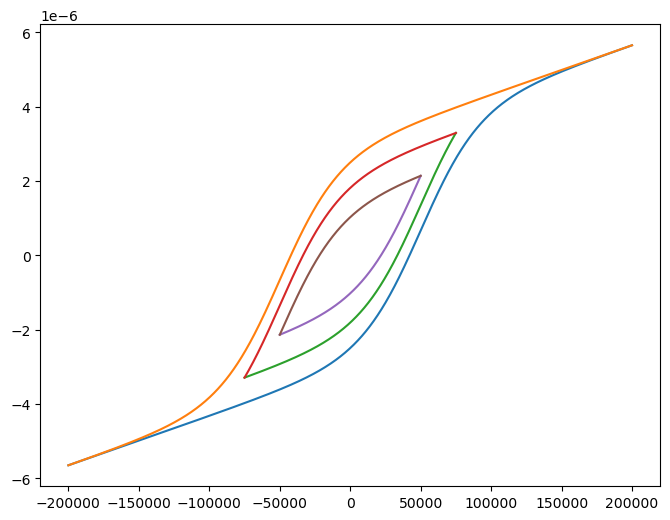

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Given device parameters
Pr = 2.5e-6  # Remnant polarization (C/cm^2)
Ps = 3e-6    # Saturation polarization (C/cm^2)
Ec = 50e3    # Coercive field (V/cm)
epsilon_F = 150  # Dielectric constant of ferroelectric
epsilon_0 = 8.85e-14  # Vacuum permittivity in F/cm

# Maximum electric field values
Em_values = [200e3, 75e3, 50e3]

# Calculate delta using EQ2
delta = Ec * (np.log((1 + Pr/Ps)/(1 - Pr/Ps))) ** -1

# Define functions for the polarization equations
def P_plus(E, Em):
    return Ps * np.tanh((E - Ec)/(2 * delta)) + epsilon_F * epsilon_0 * E + 0.5 * (
            Ps * np.tanh((Em + Ec)/(2 * delta)) - Ps * np.tanh((Em - Ec)/(2 * delta)))

def P_minus(E, Em):
    return -P_plus(-E, Em)

def P_total(E, Em):
    return epsilon_F * epsilon_0 * Em + 0.5 * (Ps * np.tanh((Em + Ec)/(2 * delta)) + Ps * np.tanh((Em - Ec)/(2 * delta)))

# Plot the P–E loops
plt.figure(figsize=(8, 6))

# Plot P–E curves for Em = 200, 75, and 50 using their respective Emax values
for Em in Em_values:
    Emax = np.abs(Em)
    E_values = np.linspace(-Emax, Emax, 1000)
    plt.plot(E_values, P_plus(E_values, Em), label=f'P+ (Em={Em/1e3} kV/cm)')
    plt.plot(E_values, P_minus(E_values, Em), label=f'P- (Em={Em/1e3} kV/cm)')

# Plot the Pd curve for Em = 200 using its Emax value
Emax_200 = np.abs(Em_values[0])
E_values_200 = np.linspace(-Emax_200, Emax_200, 1000)
Pd_values_200 = P_total(E_values_200, Em_values[0])
plt.plot(E_values_200, Pd_values_200, '--', label='Pd (Em=200 kV/cm)', color='black')

plt.title('Minor Hysteresis Loop of P–E for Ferroelectric Material')
plt.xlabel('Electric Field (V/cm)')
plt.ylabel('Polarization (C/cm^2)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


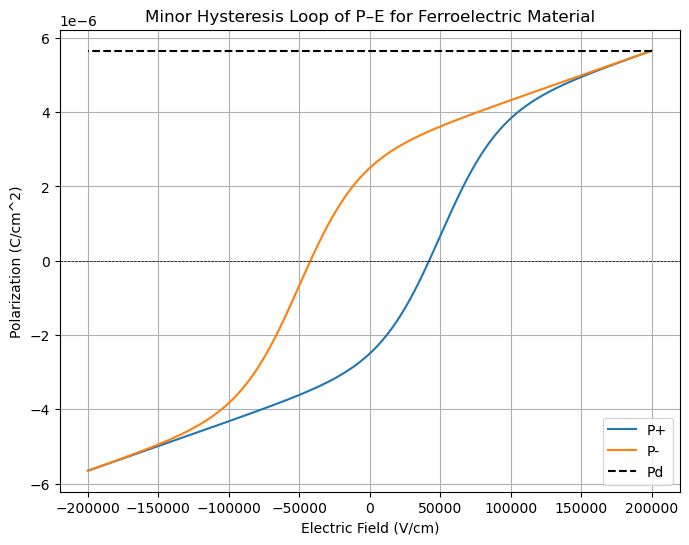

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Given device parameters
Pr = 2.5e-6  # Remnant polarization (C/cm^2)
Ps = 3e-6    # Saturation polarization (C/cm^2)
Ec = 50e3    # Coercive field (V/cm)
epsilon_F = 150  # Dielectric constant of ferroelectric
epsilon_0 = 8.85e-14  # Vacuum permittivity in F/cm

# Maximum electric field values
Em_values = [200e3, 75e3, 50e3]

# Calculate delta using EQ2
delta = Ec * (np.log((1 + Pr/Ps)/(1 - Pr/Ps))) ** -1

# Define functions for the polarization equations
def P_plus(E, Em):
    return Ps * np.tanh((E - Ec)/(2 * delta)) + epsilon_F * epsilon_0 * E + 0.5 * (
            Ps * np.tanh((Em + Ec)/(2 * delta)) - Ps * np.tanh((Em - Ec)/(2 * delta)))

def P_minus(E, Em):
    return -P_plus(-E, Em)

def P_total(Em):
    return epsilon_F * epsilon_0 * Em + 0.5 * (Ps * np.tanh((Em + Ec)/(2 * delta)) + Ps * np.tanh((Em - Ec)/(2 * delta)))

# Generate electric field values
Emax = max(Em_values)
E_values = np.linspace(-Emax, Emax, 1000)

# Calculate polarization values for each electric field
P_plus_values = P_plus(E_values, Emax)
P_minus_values = P_minus(E_values, Emax)
P_total_values = P_total(Emax)

# Plot the P–E loops
plt.figure(figsize=(8, 6))
plt.plot(E_values, P_plus_values, label='P+')
plt.plot(E_values, P_minus_values, label='P-')
plt.plot([Emax, -Emax], [P_total_values, P_total_values], '--', label='Pd', color='black')
plt.title('Minor Hysteresis Loop of P–E for Ferroelectric Material')
plt.xlabel('Electric Field (V/cm)')
plt.ylabel('Polarization (C/cm^2)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

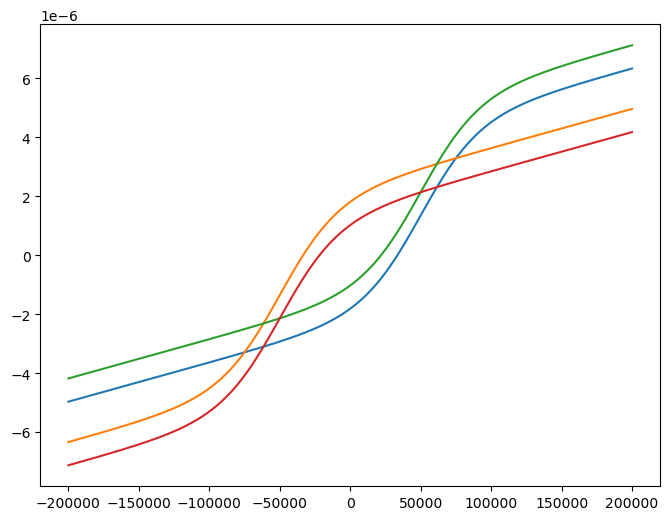

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Given device parameters
Pr = 2.5e-6  # Remnant polarization (C/cm^2)
Ps = 3e-6    # Saturation polarization (C/cm^2)
Ec = 50e3    # Coercive field (V/cm)
epsilon_F = 150  # Dielectric constant of ferroelectric
epsilon_0 = 8.85e-14  # Vacuum permittivity in F/cm

# Maximum electric field values
Em_values = [200e3, 75e3, 50e3]

# Calculate delta using EQ2
delta = Ec * (np.log((1 + Pr/Ps)/(1 - Pr/Ps))) ** -1

# Define functions for the polarization equations
def P_plus(E, Em):
    return Ps * np.tanh((E - Ec)/(2 * delta)) + epsilon_F * epsilon_0 * E + 0.5 * (
            Ps * np.tanh((Em + Ec)/(2 * delta)) - Ps * np.tanh((Em - Ec)/(2 * delta)))

def P_minus(E, Em):
    return -P_plus(-E, Em)

def P_total(Em):
    return epsilon_F * epsilon_0 * Em + 0.5 * (Ps * np.tanh((Em + Ec)/(2 * delta)) + Ps * np.tanh((Em - Ec)/(2 * delta)))

# Generate electric field values
E_values = np.linspace(-Em_values[0], Em_values[0], 1000)

# Calculate polarization values for each electric field
P_plus_values = P_plus(E_values, Em_values[0])
P_minus_values = P_minus(E_values, Em_values[0])
P_total_values = P_total(Em_values[0])

# Plot the P–E loops
plt.figure(figsize=(8, 6))

# Plot P–E curves for Em values of 75 and 50
for Em in Em_values[1:]:
    P_plus_values = P_plus(E_values, Em)
    P_minus_values = P_minus(E_values, Em)
    plt.plot(E_values, P_plus_values, label=f'P+ (Em={Em/1e3} kV/cm)')
    plt.plot(E_values, P_minus_values, label=f'P- (Em={Em/1e3} kV/cm)')

# Plot Pd curve inside the hysteresis loop
plt.plot(E_values, P_total(Em_values[0]), '--', label='Pd', color='black')

plt.title('Minor Hysteresis Loop of P–E for Ferroelectric Material')
plt.xlabel('Electric Field (V/cm)')
plt.ylabel('Polarization (C/cm^2)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


delta = 20851.619571212315


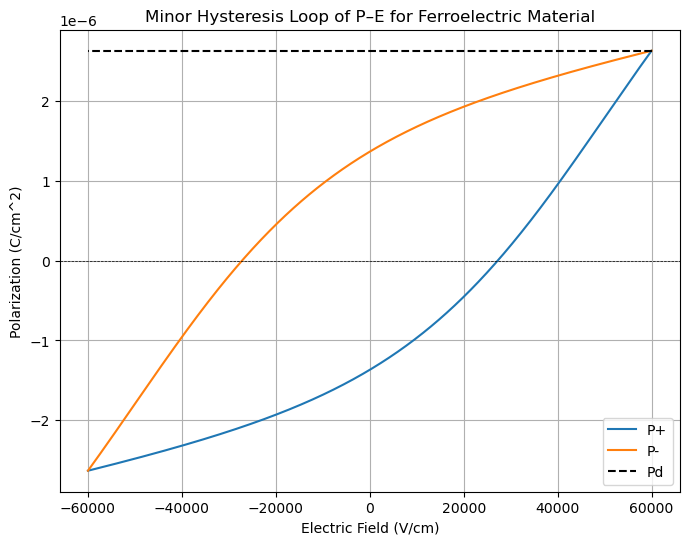

In [10]:
#Emax = 6e4  # maximum electric field in V/cm

# Calculate delta using EQ2
delta = Ec * (np.log((1 + Pr/Ps)/(1 - Pr/Ps))) ** -1           #correct

#print(f'delta = {delta}')

# Define functions for the polarization equations
def P_plus(E, Em):
    return Ps * np.tanh((E - Ec)/(2 * delta)) + epsilon_F * epsilon_0 * E + 0.5 * (Ps * np.tanh((Em + Ec)/(2 * delta)) - Ps * np.tanh((Em - Ec)/(2 * delta)))

def P_minus(E, Em):
    return -P_plus(-E, Em)

def P_total(Em):
    return epsilon_F * epsilon_0 * Em + 0.5 * (Ps * np.tanh((Em + Ec)/(2 * delta)) + Ps * np.tanh((Em - Ec)/(2 * delta)))

# Generate electric field values
E_values = np.linspace(-Emax, Emax, 1000)

# Calculate polarization values for each electric field
P_plus_values = P_plus(E_values, Emax)
P_minus_values = P_minus(E_values, Emax)
P_total_values = P_total(Emax)

# Plot the P–E loops
plt.figure(figsize=(8, 6))
plt.plot(E_values, P_plus_values, label='P+')
plt.plot(E_values, P_minus_values, label='P-')
plt.plot([Emax, -Emax], [P_total_values, P_total_values], '--', label='Pd', color='black')
plt.title('Minor Hysteresis Loop of P–E for Ferroelectric Material')
plt.xlabel('Electric Field (V/cm)')
plt.ylabel('Polarization (C/cm^2)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Ishanya\AppData\Local\Temp\ipykernel_27952\4347628.py:43: RuntimeWarning: overflow encountered in exp
  integrand = lambda psi, V: (np.exp(beta * (psi - V)) / psi_s) * (1 / N_a) * np.exp(beta * psi)
C:\Users\Ishanya\AppData\Local\Temp\ipykernel_27952\4347628.py:43: RuntimeWarning: invalid value encountered in scalar multiply
  integrand = lambda psi, V: (np.exp(beta * (psi - V)) / psi_s) * (1 / N_a) * np.exp(beta * psi)


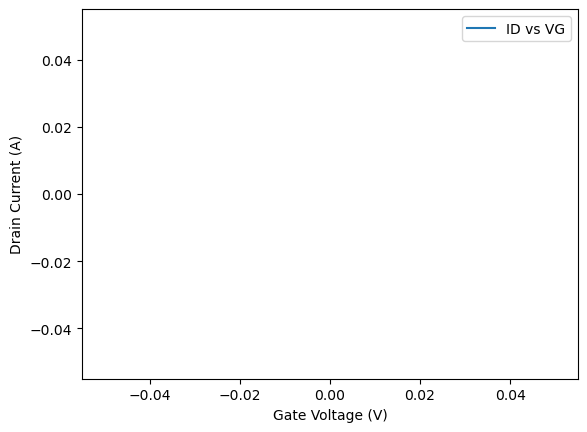

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad
from scipy.optimize import fsolve

# Given device parameters
Pr = 2.5e-6  # Remnant polarization (C/cm^2)
Ps = 3e-6    # Saturation polarization (C/cm^2)
Ec = 50e3    # Coercive field (V/cm)
epsilon_F = 150  # Dielectric constant of ferroelectric
epsilon_SiO2 = 3.9  # Dielectric constant of SiO2
epsilon_Si = 11.7  # Dielectric constant of Si
epsilon_0 = 8.85e-14  # vacuum permittivity in F/cm
t_F = 200e-7     # Ferroelectric film thickness (cm)
EOT = 4e-7       # Equivalent oxide thickness of insulator (cm)
N_a = 1e16       # Substrate doping concentration (/cm^3)
A_F = 1          # Ferroelectric film area for capacitor (cm^2)
A_I = 1          # Insulator film area for capacitor (cm^2)
mu = 300         # Electron mobility (cm^2/V-s)
L = 1e-4         # Channel length for FET (cm)
W = 1e-4         # Channel width for FET (cm)

# Constants
q = 1.602176634e-19  # Elementary charge (C)
k = 1.380649e-23     # Boltzmann constant (J/K)
T = 300             # Temperature (K)

# Function to calculate Q_s
def Q_s(psi_s, V):
    beta = np.sqrt((2 * epsilon_Si * epsilon_0 * k * T) / (q * L))
    factor1 = np.exp(-beta * psi_s) + beta * psi_s - 1
    factor2 = (N_a / np.sqrt(N_a ** 2 + 4 * np.exp(beta * V) * np.exp(beta * psi_s))) ** 0.5
    Q_s = factor1 + (N_a / (factor2 + 1 / factor2)) * np.exp(beta * V) * (np.exp(beta * psi_s) - beta * psi_s * np.exp(beta * V) - 1)
    Q_s *= np.sqrt(2) * epsilon_Si * epsilon_0 * (k * T) / (q * L)
    return Q_s

# Function to calculate gate voltage
def calculate_VG(psi_s, V):
    return psi_s + Q_s(psi_s, V) / (epsilon_SiO2 * epsilon_0 / EOT) + epsilon_F * epsilon_0 * t_F

# Function to calculate drain current
def calculate_ID(V, psi_s):
    integrand = lambda psi, V: (np.exp(beta * (psi - V)) / psi_s) * (1 / N_a) * np.exp(beta * psi)
    ID, _ = dblquad(integrand, psi_B, psi_s, lambda psi: 0, lambda psi: V_DS)
    ID *= q * mu * W / L
    return ID

# Function to find psi_s given VG
def find_psi_s(VG):
    equation = lambda psi_s: VG - calculate_VG(psi_s, 0)
    psi_s_guess = fsolve(equation, 0)[0]
    return psi_s_guess

# Gate voltage range
VG_range = np.linspace(0, 5, 100)

# Define drain-source voltage (you should set this based on your specific scenario)
V_DS = 1.0  # Set an appropriate value

# Other constants
psi_B = 0

# Initialize arrays to store results
ID_values = []

# Calculate ID for each VG
for VG in VG_range:
    psi_s = find_psi_s(VG)
    ID = calculate_ID(VG, psi_s)
    ID_values.append(ID)

# Plot the results
plt.plot(VG_range, ID_values, label='ID vs VG')
plt.xlabel('Gate Voltage (V)')
plt.ylabel('Drain Current (A)')
plt.legend()
plt.show()
